In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="4"

# 3D example

Running simulations in 3D should be just as easy as adding an extra dimension to a 2D simulation script, where appropriate

In [2]:
from jax import numpy as jnp
import numpy as np

In [3]:
# Defining geometry
from jwave.geometry import kGrid, Medium

N = (128, 128, 128)
dx = (1., 1., 1.)
omega = 1

# Making geometry
grid = kGrid.make_grid(N, dx)

# Physical properties
sound_speed = jnp.ones(N)
sound_speed = sound_speed.at[30:90, 60:90, 60:90].set(1.7)
medium = Medium(
    sound_speed=sound_speed,
    density=1.,
    attenuation=0.0,
    pml_size=15
)

src_field = jnp.zeros(grid.N).astype(jnp.complex64)
src_field = src_field.at[32, 32, 32].set(10.0)

![](_images/3d_rectangle_sos.png)

In [4]:
from jwave.physics import solve_helmholtz

field = solve_helmholtz(
    grid, 
    medium, 
    src_field, 
    omega,
    maxiter=1000,
).block_until_ready()

Text(0.5, 1.0, 'Imaginary wavefield')

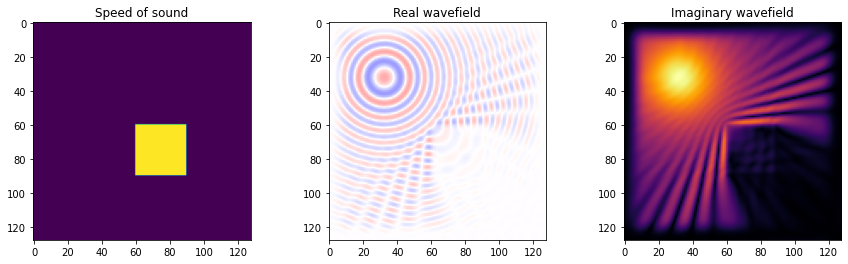

In [5]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1,3,figsize=(15,4))

axes[0].imshow(medium.sound_speed[50])
axes[0].set_title("Speed of sound")
axes[1].imshow(field.real[50], vmin=-.2, vmax=.2, cmap="seismic")
axes[1].set_title("Real wavefield")
axes[2].imshow(jnp.abs(field[50]), cmap="inferno")
axes[2].set_title("Imaginary wavefield")